In [1213]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import statsmodels.graphics.api as smg
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA



In [1214]:
sellers = pd.read_csv(r"C:\testes_sckit_learn\dados.csv",sep=";")

In [1215]:
sellers.dropna(inplace=True)
sellers


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,count
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,02/10/2017 10:56,02/10/2017 11:07,04/10/2017 19:55,10/10/2017 21:25,18/10/2017 00:00,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,02/10/2017 10:56,02/10/2017 11:07,04/10/2017 19:55,10/10/2017 21:25,18/10/2017 00:00,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,02/10/2017 10:56,02/10/2017 11:07,04/10/2017 19:55,10/10/2017 21:25,18/10/2017 00:00,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,24/07/2018 20:41,26/07/2018 03:24,26/07/2018 14:31,07/08/2018 15:27,13/08/2018 00:00,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,08/08/2018 08:38,08/08/2018 08:55,08/08/2018 13:50,17/08/2018 18:06,04/09/2018 00:00,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32233,045fb730a757a5379d79bdbc42d4e84b,57cffec2e5c21ad9bee83cc699bfc9b0,delivered,03/08/2018 06:19,04/08/2018 04:10,13/08/2018 14:45,17/08/2018 00:31,23/08/2018 00:00,1.0,boleto,1.0,48.48,2ca298adaa0c377d5450bb1558b40e27,37701,pocos de caldas,MG,1
32234,66823322383fb178187b76028b8f8eab,7d3460ebd7b140cb166071ca96858a90,delivered,11/10/2017 11:01,11/10/2017 11:14,23/10/2017 16:14,08/11/2017 18:18,13/11/2017 00:00,1.0,credit_card,3.0,91.97,098ffeb0f6960a1d85eb26c432a1319e,40310,salvador,BA,1
32235,c8634f3e7a329c927fe2973bf2b54caf,2bbeb09dc86b81185d6ab5592b1e2e8c,delivered,10/01/2018 20:58,10/01/2018 21:09,18/01/2018 12:15,04/02/2018 15:21,20/02/2018 00:00,1.0,credit_card,1.0,96.86,9da141f9addcf3734a01b6cbca7ee3d0,27185,arrozal,RJ,1
32236,c4f3b6a5e1b0cd332ac54136c94c5053,8c3ef80af590b71396ade3b7a82484f5,delivered,28/03/2017 23:10,28/03/2017 23:22,30/03/2017 15:05,03/04/2017 08:17,24/04/2017 00:00,1.0,credit_card,3.0,156.58,b1fc3e5a5a1beeed3fc59019282564d2,4774,sao paulo,SP,1


In [1216]:
sellers.columns

vendas =sellers[[
       
       'payment_sequential', 'payment_installments',
       'payment_value', 'customer_zip_code_prefix',
        'count']]

vendas

,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,count
0,1.0,1.0,18.12,3149,3
1,3.0,1.0,2.00,3149,3
2,2.0,1.0,18.59,3149,3
3,1.0,1.0,141.46,47813,1
4,1.0,3.0,179.12,75265,1
...,...,...,...,...,...
32233,1.0,1.0,48.48,37701,1
32234,1.0,3.0,91.97,40310,1
32235,1.0,1.0,96.86,27185,1
32236,1.0,3.0,156.58,4774,1


In [1217]:
y = vendas['payment_value']

X = vendas.drop('payment_value',axis=1).values
X= sm.add_constant(X, prepend=False)

In [1218]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train


olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:          payment_value   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     592.5
Date:                Mon, 15 May 2023   Prob (F-statistic):               0.00
Time:                        18:52:06   Log-Likelihood:            -1.5338e+05
No. Observations:               22566   AIC:                         3.068e+05
Df Residuals:                   22561   BIC:                         3.068e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.1103      3.743      0.564      0.5

In [1219]:

# Imprime as métricas de MAE
print(f'Métrica MAE na base de treino: {mean_absolute_error(y_train, olsres.predict(X_train))}')
print(f'Métrica MAE na base de teste: {mean_absolute_error(y_test, olsres.predict(X_test))}')


Métrica MAE na base de treino: 98.61126755146103
Métrica MAE na base de teste: 100.37442756851271


In [1220]:

# Imprime as métricas de MSE
print(f'Métrica MSE na base de treino: {mean_squared_error(y_train, olsres.predict(X_train))}')
print(f'Métrica MSE na base de teste: {mean_squared_error(y_test, olsres.predict(X_test))}')

Métrica MSE na base de treino: 46928.5604981877
Métrica MSE na base de teste: 47825.79767408417


In [ ]:
sellers.set_index()

In [ ]:

decompose_data = seasonal_decompose(sellers, model="additive")
decompose_data.plot();

In [ ]:
sellers.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'count'],
      dtype='object')

<Axes: xlabel='order_purchase_timestamp'>

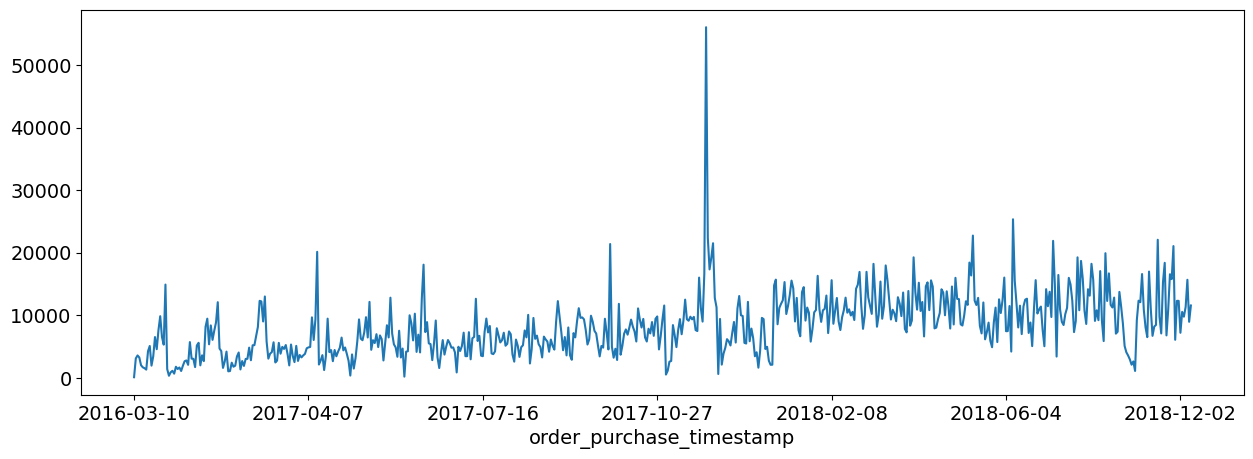

In [ ]:
sellers['order_purchase_timestamp'] = sellers['order_purchase_timestamp'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d'))
sellers = sellers[['order_purchase_timestamp','payment_value']]
sellers = sellers.groupby('order_purchase_timestamp')['payment_value'].sum().reset_index()
sellers['payment_value'] = sellers['payment_value'].astype(float)
sellers.set_index('order_purchase_timestamp',inplace=True)

endog = sellers['payment_value']
endog.plot(figsize=(15, 5))


In [ ]:
# Construct the model
mod = sm.tsa.SARIMAX(sellers, order=(1, 0, 0), trend='c')
# Estimate the parameters
res = mod.fit()

print(res.summary())


                               SARIMAX Results                                
Dep. Variable:          payment_value   No. Observations:                  607
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -5915.605
Date:                Mon, 15 May 2023   AIC                          11837.211
Time:                        18:38:26   BIC                          11850.436
Sample:                             0   HQIC                         11842.356
                                - 607                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3772.7237    306.356     12.315      0.000    3172.278    4373.170
ar.L1          0.5402      0.023     23.469      0.000       0.495       0.585
sigma2      1.702e+07   3.46e+05     49.160      0.0

c:\testes_sckit_learn\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\testes_sckit_learn\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Axes: xlabel='order_purchase_timestamp'>

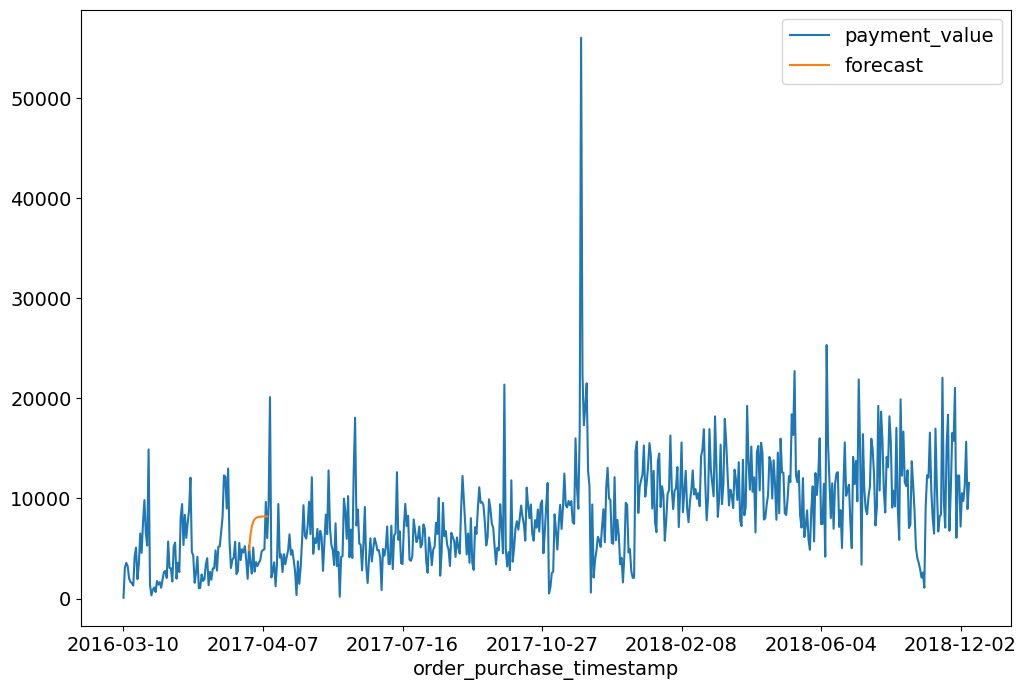

In [ ]:
sellers['forecast']=res.predict(start=90,end=103,dynamic=True)
sellers[['payment_value','forecast']].plot(figsize=(12,8))

In [ ]:
pred_uc = res.predict(60)
pred_uc


order_purchase_timestamp
2017-02-24     5607.567801
2017-02-25     5951.289804
2017-02-26     4488.607699
2017-02-27     5213.026452
2017-02-28     4792.448832
                  ...     
2018-12-04     9461.649072
2018-12-05     9044.636584
2018-12-06     9891.841747
2018-12-07    12234.236544
2018-12-08     8604.045605
Name: predicted_mean, Length: 547, dtype: float64

In [ ]:
pred_uc = res.predict(start=('2017-08-17'), end=('2018-08-17'))
pred_uc

order_purchase_timestamp
2017-08-17     7133.666054
2017-08-18     7410.590435
2017-08-19     6664.089466
2017-08-20     6421.417367
2017-08-21     5526.623084
                  ...     
2018-08-13    14529.274495
2018-08-14    10404.108098
2018-08-15    12786.929339
2018-08-16    10066.171333
2018-08-17     9840.303973
Name: predicted_mean, Length: 332, dtype: float64

In [ ]:
data['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
data[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
endog.loc['2017-08-17':]

order_purchase_timestamp
2017-08-17     6734.65
2017-08-18     5352.68
2017-08-19     4903.43
2017-08-20     3246.93
2017-08-21     6572.18
                ...   
2018-12-04     9759.70
2018-12-05    11328.10
2018-12-06    15664.49
2018-12-07     8944.05
2018-12-08    11551.93
Name: payment_value, Length: 376, dtype: float64

In [ ]:
index = pd.period_range(start='2021', periods=4, freq='A')
endog1 = pd.Series([1, 2, 3, 4], index=index)
print(endog.index)


In [ ]:
res.predict(x)

In [ ]:

fcast_res3 = res.get_forecast(12,)
print(fcast_res3.summary_frame())

payment_value          mean      mean_se  mean_ci_lower  mean_ci_upper
607            10012.748360  4125.638124    1926.646223   18098.850497
608             9181.326126  4689.065652      -9.073674   18371.725925
609             8732.215433  4841.123137    -756.211559   18220.642426
610             8489.618584  4884.599274   -1084.020072   18063.257241
611             8358.574652  4897.212235   -1239.784953   17956.934258
612             8287.788440  4900.886395   -1317.772387   17893.349267
613             8249.551737  4901.957942   -1358.109284   17857.212758
614             8228.897355  4902.270560   -1379.376385   17837.171096
615             8217.740445  4902.361774   -1390.712071   17826.192960
616             8211.713798  4902.388388   -1396.790881   17820.218477
617             8208.458375  4902.396154   -1400.061524   17816.978274
618             8206.699887  4902.398420   -1401.824453   17815.224228


c:\testes_sckit_learn\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\testes_sckit_learn\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


c:\testes_sckit_learn\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\testes_sckit_learn\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


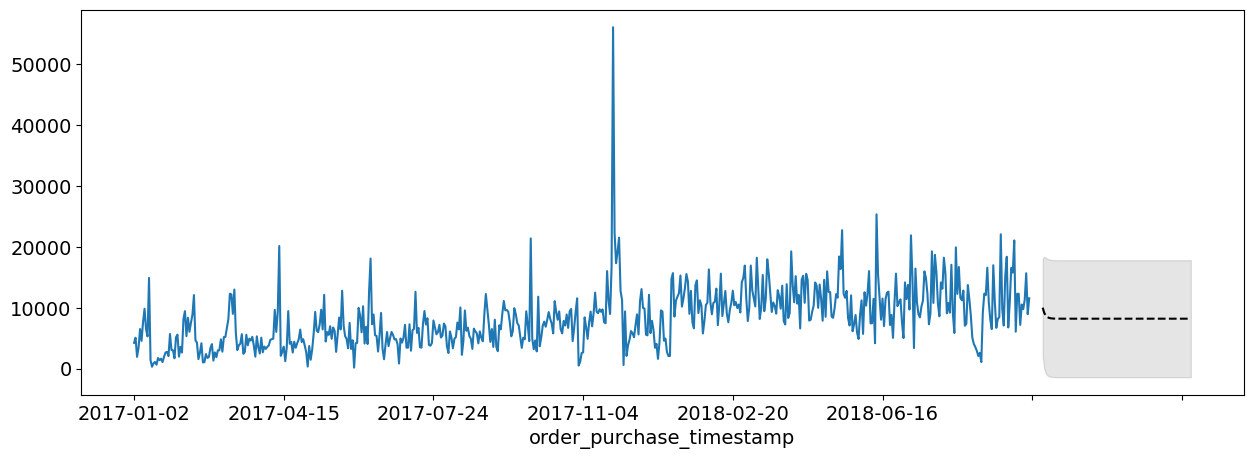

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))

endog.loc['2017':].plot(ax=ax)


fcast = res.get_forecast(100).summary_frame()
fcast['mean'].plot(ax=ax, style='k--')

ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1);


<Axes: xlabel='order_purchase_timestamp'>

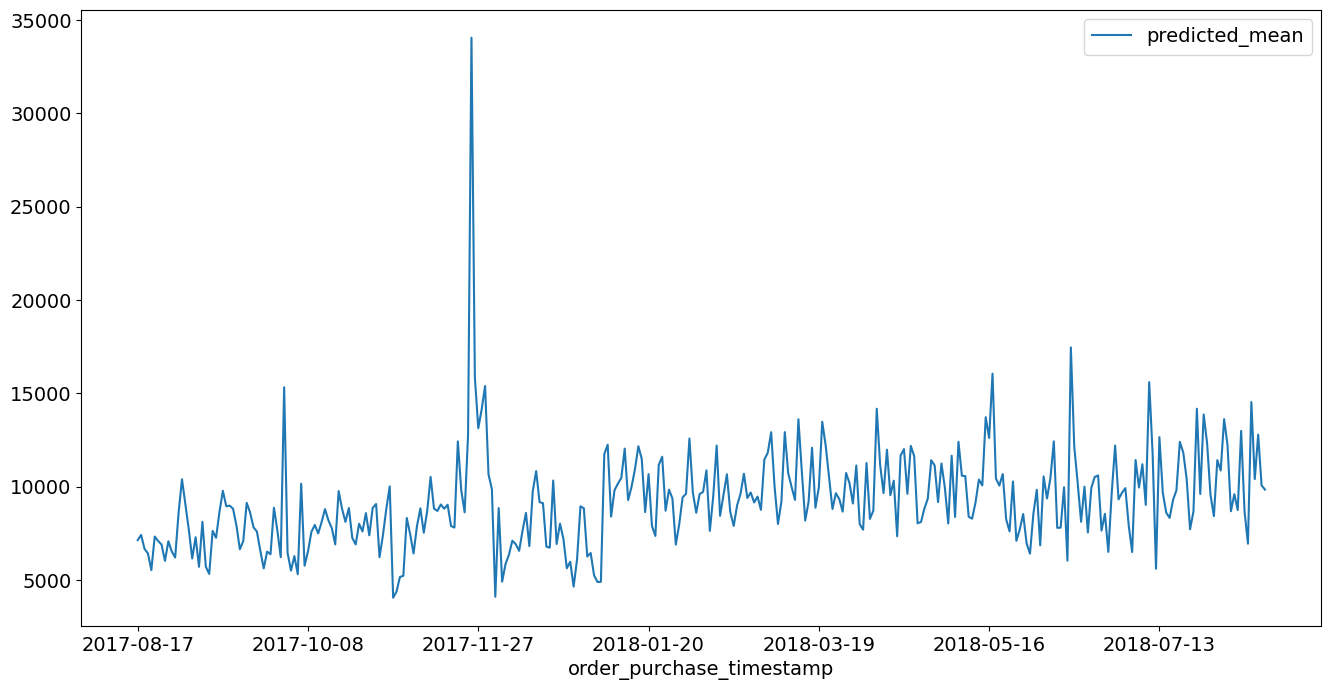

In [ ]:

fcast = res.predict(start=('2017-08-17'), end=('2018-08-17'))
previsao_vendas = pd.DataFrame(fcast)
previsao_vendas.plot()

In [ ]:
fcast = res.predict(start=('2017-08-17'), end=('2018-08-17'))

In [ ]:
# The default is to get a one-step-ahead forecast:
print(res.forecast())


607    10012.74836
dtype: float64


c:\testes_sckit_learn\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\testes_sckit_learn\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
print(res.forecast(steps=4))


607    10012.748360
608     9181.326126
609     8732.215433
610     8489.618584
Name: predicted_mean, dtype: float64


c:\testes_sckit_learn\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\testes_sckit_learn\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
print(fcast_res3.summary_frame())

payment_value          mean      mean_se  mean_ci_lower  mean_ci_upper
607            10012.748360  4125.638124    1926.646223   18098.850497
608             9181.326126  4689.065652      -9.073674   18371.725925


In [ ]:

fcast = res.get_forecast().summary_frame()

c:\testes_sckit_learn\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\testes_sckit_learn\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
print(fcast_res1.summary_frame(alpha=0.10))


infl       mean   mean_se  mean_ci_lower  mean_ci_upper
2009Q4  3.68921  2.480302      -0.390523       7.768943


In [ ]:
modelo = sm.OLS(y,X)
teste = modelo.fit()

In [ ]:
print(teste.summary())

                                 OLS Regression Results                                
Dep. Variable:          payment_value   R-squared (uncentered):                   0.257
Model:                            OLS   Adj. R-squared (uncentered):              0.257
Method:                 Least Squares   F-statistic:                              3717.
Date:                Mon, 15 May 2023   Prob (F-statistic):                        0.00
Time:                        16:41:07   Log-Likelihood:                     -2.2167e+05
No. Observations:               32165   AIC:                                  4.433e+05
Df Residuals:                   32162   BIC:                                  4.434e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
teste.params

x1    105.406931
x2      0.001667
x3    -41.195999
dtype: float64

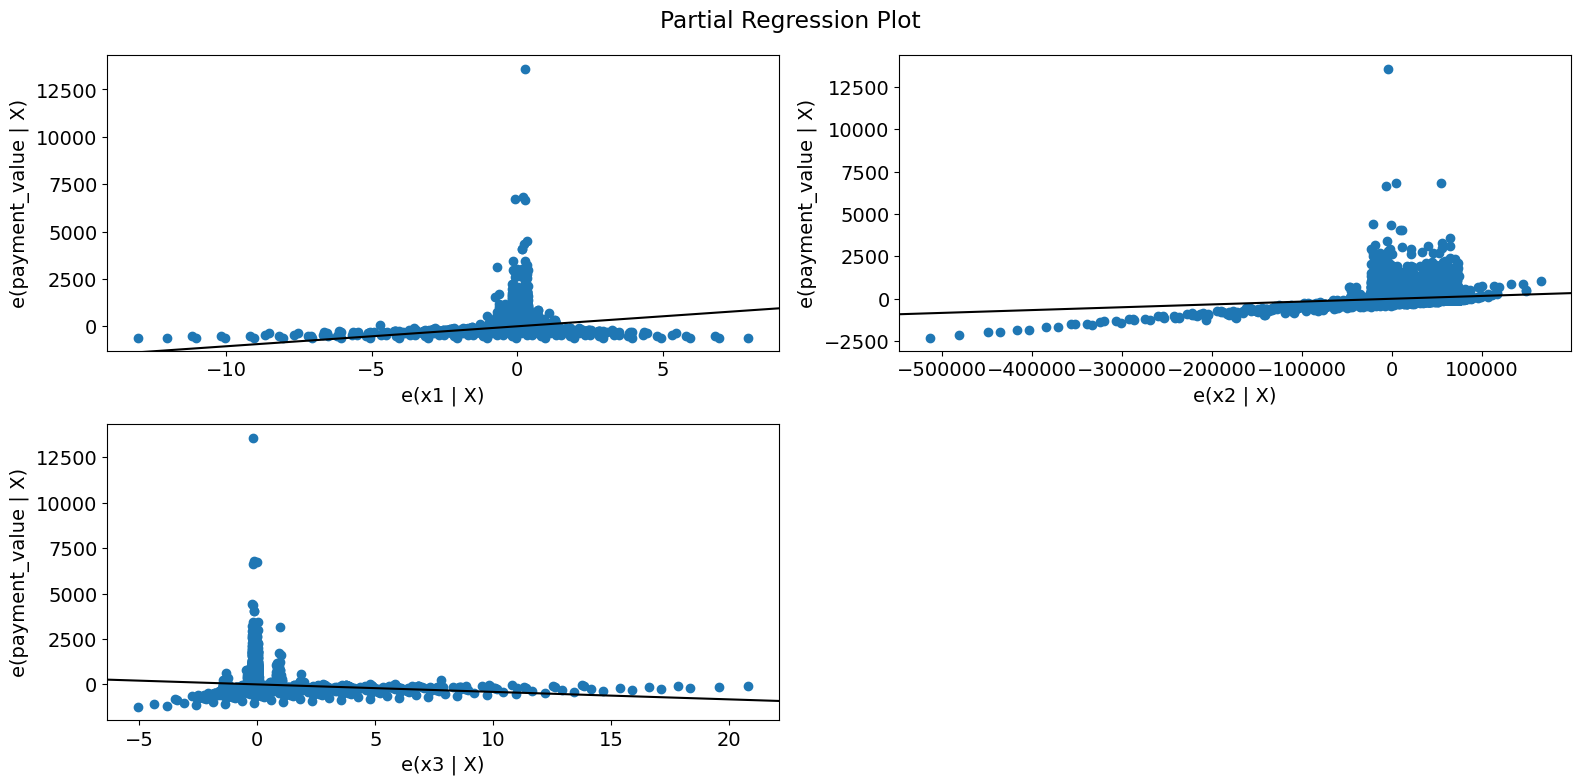

In [ ]:
fig = sm.graphics.plot_partregress_grid(teste)
fig.tight_layout(pad=1.0)

In [ ]:

scaler = StandardScaler()
normalized_data = scaler.fit_transform(X)
modelo = sm.OLS(y,X)
teste = modelo.fit()


In [ ]:
normalized_data

array([[-0.13930336, -1.06857204,  1.60030179],
       [ 2.80174846, -1.06857204,  1.60030179],
       [ 1.33122255, -1.06857204,  1.60030179],
       ...,
       [-0.13930336, -0.25720571, -0.165823  ],
       [-0.13930336, -1.01371806, -0.165823  ],
       [-0.13930336,  1.73357187, -0.165823  ]])

In [ ]:
X = sellers.drop('payment_value',axis=1)

normalized_X = pd.DataFrame(normalized_data, columns=X.columns)
normalized_X

,payment_sequential,customer_zip_code_prefix,count
0,-0.139303,-1.068572,1.600302
1,2.801748,-1.068572,1.600302
2,1.331223,-1.068572,1.600302
3,-0.139303,0.439119,-0.165823
4,-0.139303,1.365797,-0.165823
...,...,...,...
32160,-0.139303,0.097776,-0.165823
32161,-0.139303,0.185846,-0.165823
32162,-0.139303,-0.257206,-0.165823
32163,-0.139303,-1.013718,-0.165823


In [ ]:
vendas = pd.read_csv(r"C:\testes_sckit_learn\dados.csv",sep=";")

vendas_data = vendas[['order_purchase_timestamp','payment_value']]
vendas_data['order_purchase_timestamp'] = vendas_data['order_purchase_timestamp'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d'))
vendas_data['payment_value'] = vendas_data['payment_value'].astype(float)
vendas_data = vendas_data.groupby(['order_purchase_timestamp'])['payment_value'].sum().reset_index()
vendas_data.set_index('order_purchase_timestamp',inplace=True)

C:\Users\Guilh\AppData\Local\Temp\ipykernel_20912\1495562779.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_data['order_purchase_timestamp'] = vendas_data['order_purchase_timestamp'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d'))
C:\Users\Guilh\AppData\Local\Temp\ipykernel_20912\1495562779.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_data['payment_value'] = vendas_data['payment_value'].astype(float)


In [ ]:
vendas_data

,payment_value
order_purchase_timestamp,
2016-03-10,80.04
2016-04-10,3090.97
2016-05-10,3561.18
2016-06-10,3239.92
2016-07-10,2000.75
...,...
2018-12-04,9759.70
2018-12-05,11328.10
2018-12-06,15664.49


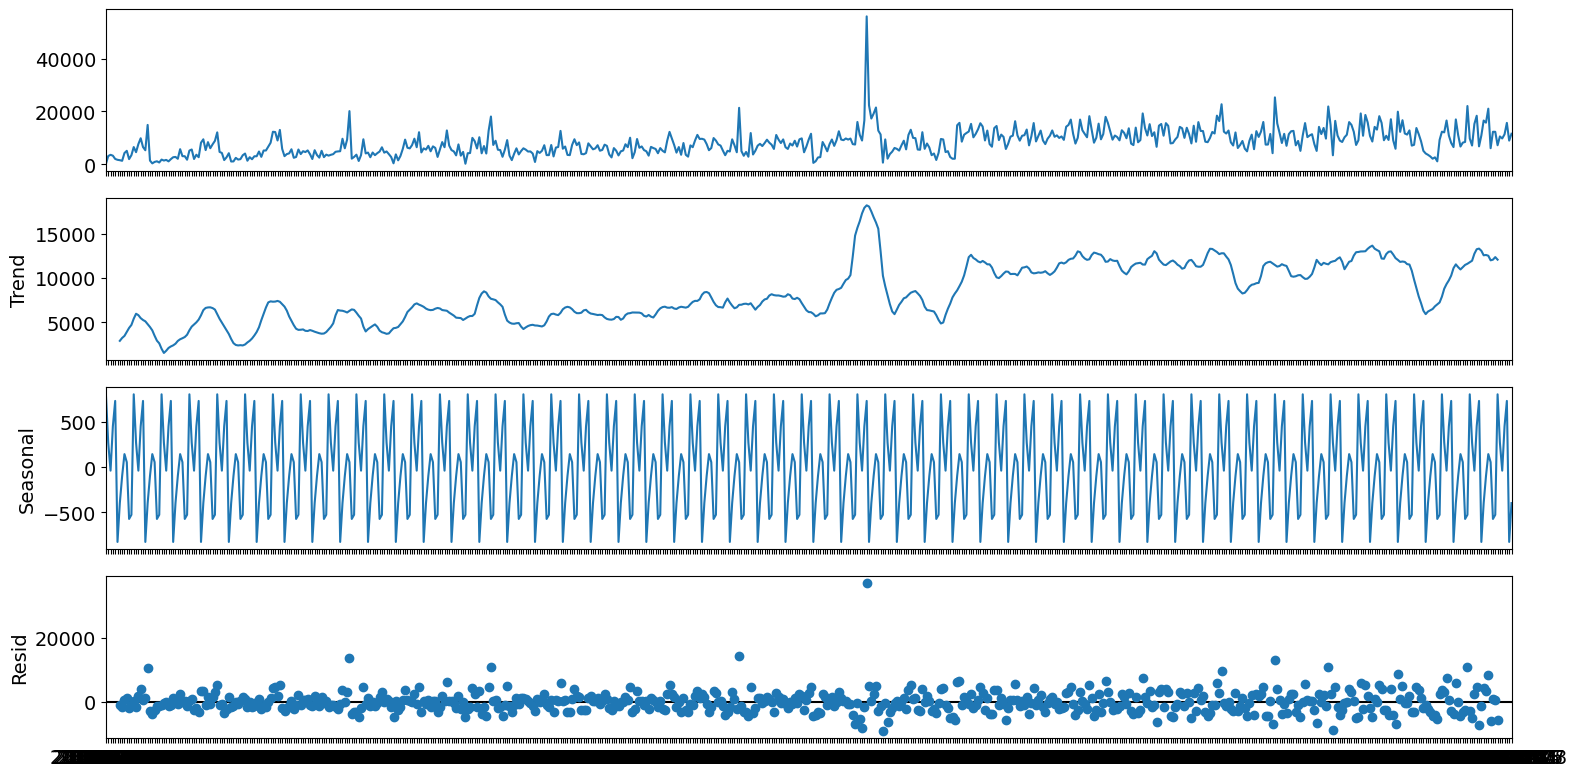

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_data = seasonal_decompose(vendas_data, model="additive",period=12)
decompose_data.plot();


<Axes: xlabel='order_purchase_timestamp'>

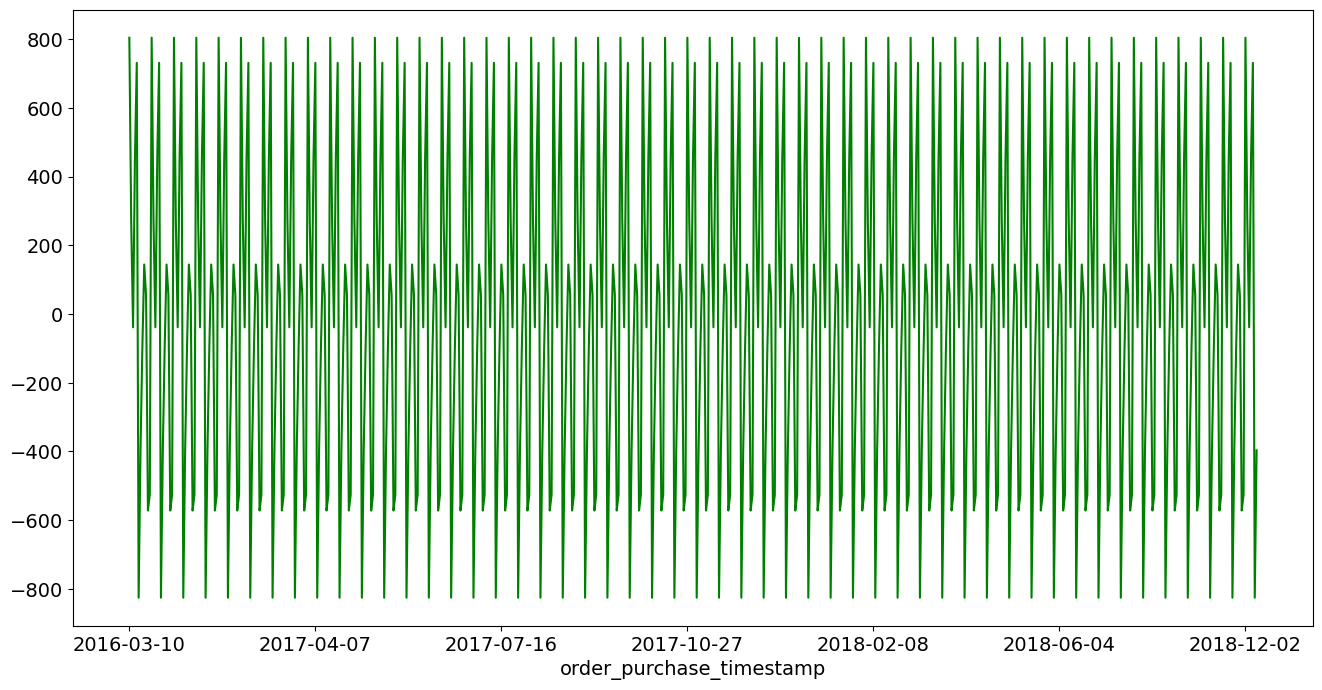

In [ ]:
seasonality=decompose_data.seasonal
seasonality.plot(color='green')

In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(vendas_data.payment_value, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.8471446601997674
2. P-Value :  0.05184864463517397
3. Num Of Lags :  15
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 591
5. Critical Values :
	 1% :  -3.4414632489439714
	 5% :  -2.866442840548375
	 10% :  -2.5693810879206143


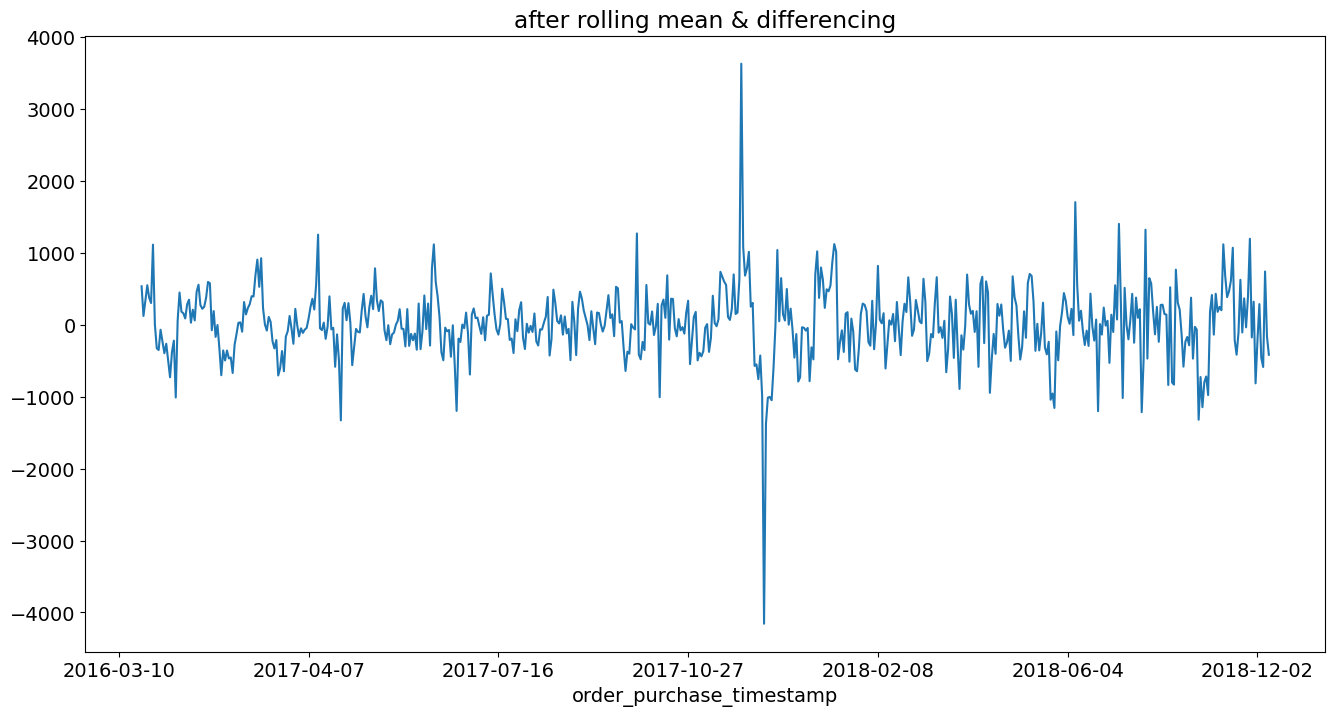

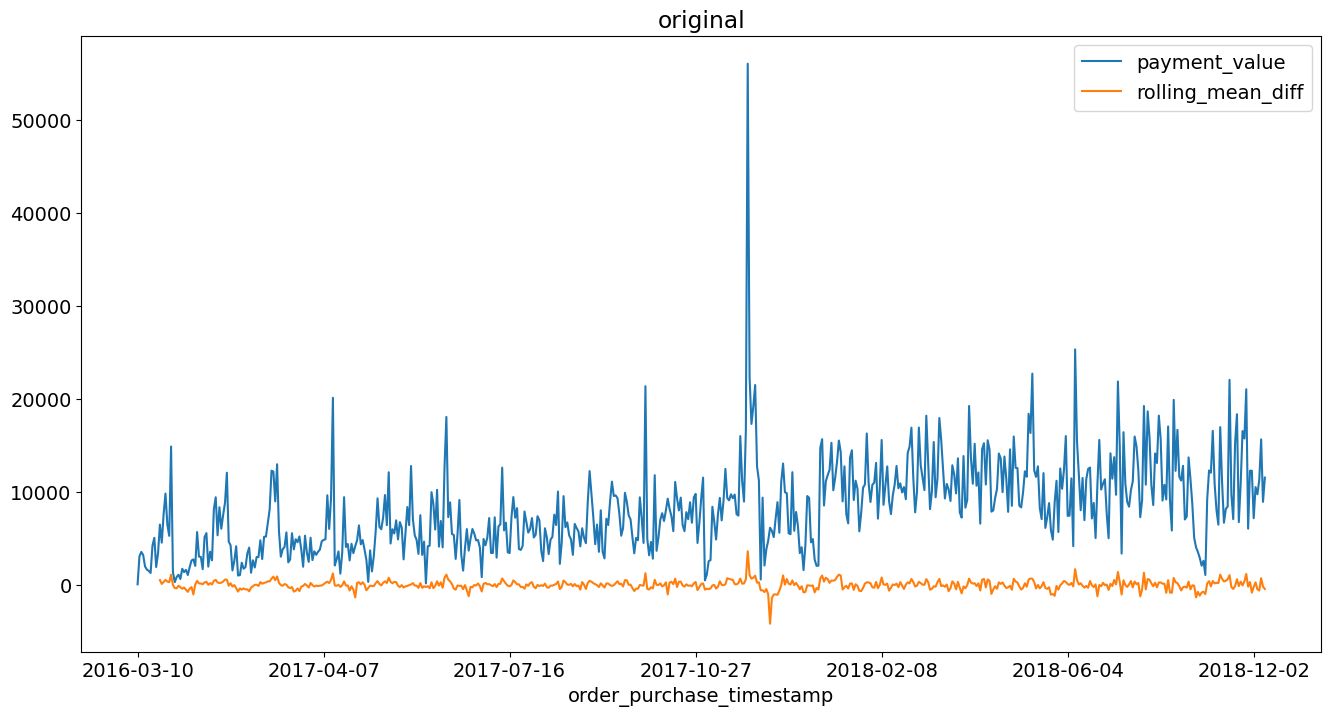

In [ ]:
rolling_mean = vendas_data.rolling(window = 12).mean()
vendas_data['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
vendas_data['rolling_mean_diff'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
vendas_data.plot(title='original');

In [ ]:
dftest = adfuller(vendas_data['rolling_mean_diff'].dropna(), autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
  print("\t",key, ": ", val)

1. ADF :  -7.295322290931763
2. P-Value :  1.38282492978083e-10
3. Num Of Lags :  17
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 577
5. Critical Values :
	 1% :  -3.441734108219804
	 5% :  -2.8665621113012514
	 10% :  -2.5694446417404313


In [ ]:
model=sm.tsa.arima.ARIMA(vendas_data['payment_value'],order=(1,1,1))
history=model.fit()
history

c:\testes_sckit_learn\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\testes_sckit_learn\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\testes_sckit_learn\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [1222]:
history.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          payment_value   No. Observations:                  607
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5872.802
Date:                Mon, 15 May 2023   AIC                          11751.603
Time:                        18:52:20   BIC                          11764.824
Sample:                             0   HQIC                         11756.748
                                - 607                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3336      0.039      8.607      0.000       0.258       0.410
ma.L1         -0.9686      0.011    -88.110      0.000      -0.990      -0.947
sigma2      1.672e+07   1.76e-09   9.53e+15      0.000    1.67e+07    1.67e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):             21974.93
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               2.02   Skew:                             2.98
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.39e+30. Standard errors may be unstable.
"""

<Axes: xlabel='order_purchase_timestamp'>

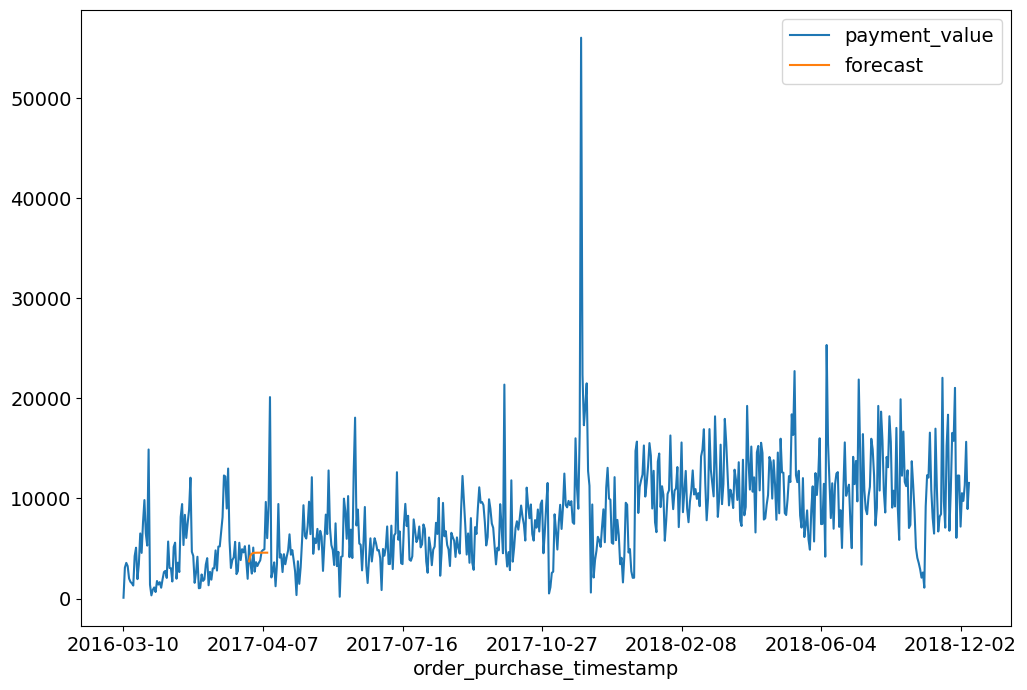

In [1225]:
vendas_data['forecast']=history.predict(start=90,end=103,dynamic=True)
vendas_data[['payment_value','forecast']].plot(figsize=(12,8))

In [1227]:
model=ARIMA(vendas_data['rolling_mean_diff'].dropna(),order=(1,1,1))
model_fit=model.fit()

c:\testes_sckit_learn\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\testes_sckit_learn\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\testes_sckit_learn\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Axes: xlabel='order_purchase_timestamp'>

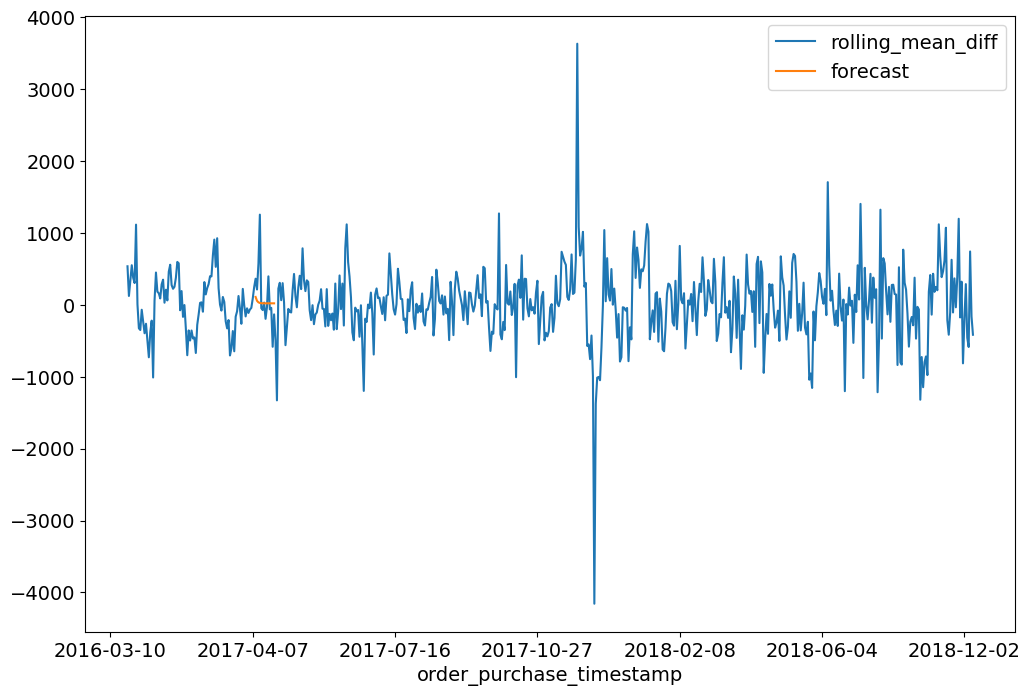

In [1228]:
vendas_data['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
vendas_data[['rolling_mean_diff','forecast']].plot(figsize=(12,8))

In [1229]:
model=sm.tsa.statespace.SARIMAX(vendas_data['payment_value'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

c:\testes_sckit_learn\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\testes_sckit_learn\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Axes: xlabel='order_purchase_timestamp'>

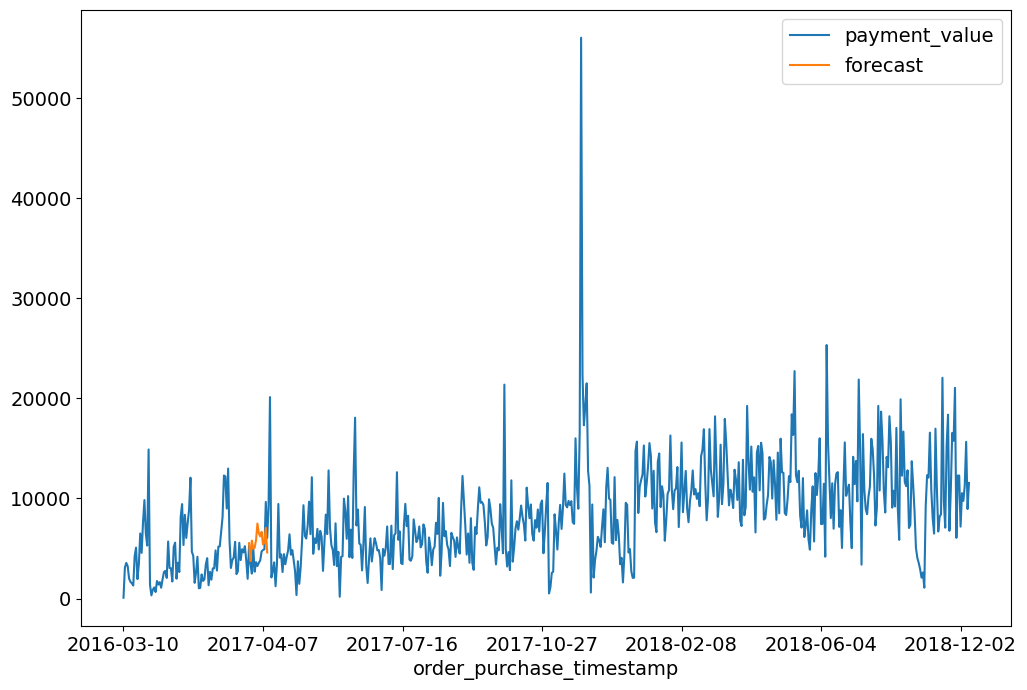

In [1232]:
vendas_data['forecast']=results.predict(start=90,end=103,dynamic=True)
vendas_data[['payment_value','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
pred_date=[vendas_data.index[-1]+ DateOffset(months=x)for x in range(0,24)]



In [ ]:
pred_date=pd.DataFrame(index=pred_date[1:],columns=vendas_data.columns)
pred_date

In [ ]:
data=pd.concat([vendas_data,pred_date])


In [ ]:
data['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
data[['Sales', 'forecast']].plot(figsize=(12, 8))